# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
cities

['ushuaia',
 'kandla',
 'narasannapeta',
 'new norfolk',
 'manggar',
 'rio grande',
 'mataura',
 'bredasdorp',
 'yellowknife',
 'castro',
 'zuenoula',
 'khatanga',
 'taolanaro',
 'punta arenas',
 'vaini',
 'keffi',
 'esperance',
 'kuching',
 'chimalhuacan',
 'attawapiskat',
 'arraial do cabo',
 'port alfred',
 'tabiauea',
 'namibe',
 'rasshevatskaya',
 'constitucion',
 'chuy',
 'chapais',
 'champerico',
 'steinfurt',
 'uyovu',
 'mahishadal',
 'atuona',
 'calnic',
 'haines junction',
 'barrow',
 'qaanaaq',
 'alipur chatha',
 'pucallpa',
 'manado',
 'lasa',
 'leningradskiy',
 'carnarvon',
 'samusu',
 'gogrial',
 'chengde',
 'lodja',
 'arinos',
 'srednekolymsk',
 'saint-philippe',
 'taoudenni',
 'flinders',
 'ust-maya',
 'ponta do sol',
 'viedma',
 'kwinana',
 'cabo rojo',
 'aden',
 'chino valley',
 'albany',
 'adrar',
 'pinawa',
 'sungairaya',
 'juneau',
 'kendari',
 'georgetown',
 'hithadhoo',
 'rikitea',
 'novobirilyussy',
 'jiddah',
 'kapaa',
 'grootfontein',
 'cape town',
 'butaritar

In [42]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [46]:
cities = ["Abu Dhabi", "Abuja", "Accra", "Addis Ababa", "Ahmedabad", "Ahvaz", "Alexandria", "Algiers", "Allahabad", "Almaty", "Ankara", "Astana", "Auckland", "Baghdad", "Baku", "Bandung", "Bangalore", "Bangkok", "Baoding", "Barcelona", "Barranquilla", "Basra", "Beijing", "Belgrade", "Belo Horizonte", "Berlin", "Bhopal", "Birmingham", "Bogotá", "Brasília", "Brazzaville", "Brisbane", "Bucharest", "Budapest", "Buenos Aires", "Bulawayo", "Busan", "Cairo", "Calgary", "Cali", "Caloocan", "Campinas", "Cape Town", "Caracas", "Cartagena", "Casablanca", "Changchun", "Changsha", "Chaozhou", "Chengdu", "Chennai", "Chicago", "Chittagong", "Chongqing", "Cologne", "Córdoba", "Curitiba", "Daegu", "Daejeon", "Dakar", "Dalian", "Dallas", "Dar es Salaam", "Davao City", "Delhi", "Dhaka", "Dongguan", "Douala", "Dubai", "Durban", "Ekurhuleni", "Faisalabad", "Fez", "Fortaleza", "Foshan", "Fukuoka", "Fuzhou", "Giza", "Guadalajara", "Guangzhou", "Guatemala City", "Guayaquil", "Gujranwala", "Gwangju", "Hamburg", "Hangzhou", "Hanoi", "Harare", "Harbin", "Havana", "Hefei", "Hiroshima", "Ho Chi Minh City", "Hong Kong", "Houston", "Hyderabad", "Hyderabad", "Moscow"]
lat = []
lon = []
temp = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    cityurl=(query_url + city)
    response = requests.get(cityurl).json()
    lon.append(response['coord']['lon']) 
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    cloudiness.append(response['clouds']['all'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    humidity.append(response['main']['humidity'])
    max_temp.append(response['main']['temp_max'])
    wind_speed.append(response['wind']['speed'])    
        
print(f"The latitude information received is: {lat}")
print(f"The longitude information received is: {lon}")
print(f"The temperature information received is: {temp}")
print(f"The cloudiness information received is: {cloudiness}")
print(f"The country information received is: {country}")
print(f"The date information received is: {date}")
print(f"The humidity information received is: {humidity}")
print(f"The max temp information received is: {max_temp}")
print(f"The wind speed information received is: {wind_speed}")

The latitude information received is: [24.47, 9.06, 5.56, 9.01, 23.02, 31.32, 31.31, 29.94, 25.44, 43.24, 39.92, 51.13, -36.85, 33.3, 40.38, -6.93, 12.98, 13.75, 38.86, 41.38, 10.98, 14.68, 39.91, 44.82, -19.92, 52.52, 23.25, 33.52, 4.6, -15.79, -4.27, -27.47, 44.44, 47.5, -34.61, -20.16, 35.18, 30.05, 51.05, 3.43, 14.66, -22.91, -33.93, 10.51, 37.63, 33.6, 43.88, 28.19, 23.66, 30.68, 13.09, 41.88, 22.33, 29.56, 50.94, 37.88, -25.43, 35.85, 36.35, 14.69, 19.86, 32.78, -6.81, 7.06, 28.65, 26.67, 39.02, 4.04, 25.27, 43.54, -26.22, 31.42, 34.03, -3.73, 23.02, 33.59, 26.08, 30.02, 40.63, 23.13, 14.64, -2.18, 32.15, 35.16, 53.55, 30.25, 21.03, -17.83, 45.77, 23.14, 31.82, 34.39, 10.78, 22.28, 29.76, 17.36, 17.36, 55.75]
The longitude information received is: [54.37, 7.49, -0.21, 38.76, 72.58, 48.68, -92.44, -90.04, 81.83, 76.95, 32.85, 71.43, 174.77, 44.38, 49.83, 107.61, 77.6, 100.49, 115.49, 2.18, -74.8, 49.21, 116.39, 20.46, -43.95, 13.39, 77.4, -86.8, -74.08, -47.88, 15.27, 153.02, 26.1

In [47]:
print(json.dumps(response, indent=4, sort_keys=True))


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 55.75,
        "lon": 37.62
    },
    "dt": 1557189622,
    "id": 524901,
    "main": {
        "humidity": 66,
        "pressure": 1008,
        "temp": 11.05,
        "temp_max": 13.33,
        "temp_min": 8
    },
    "name": "Moscow",
    "sys": {
        "country": "RU",
        "id": 9027,
        "message": 0.0057,
        "sunrise": 1557192872,
        "sunset": 1557249458,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 2
    }
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# create a data frame 
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "cloudiness": cloudiness,
    "country": country,
    "date": date,
    "humidity": humidity,
    "max_temp": max_temp,
    "wind_speed": wind_speed
    

}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lon,temp,cloudiness,country,date,humidity,max_temp,wind_speed
0,Abu Dhabi,24.47,54.37,25.98,0,AE,1557187200,78,27.00,2.60
1,Abuja,9.06,7.49,29.25,61,NG,1557189994,63,29.25,1.97
2,Accra,5.56,-0.21,29.00,0,GH,1557187200,83,29.00,3.10
3,Addis Ababa,9.01,38.76,14.38,53,ET,1557189861,48,14.38,0.91
4,Ahmedabad,23.02,72.58,27.00,0,IN,1557187200,57,27.00,1.50


In [49]:
weather_data.count()

city          98
lat           98
lon           98
temp          98
cloudiness    98
country       98
date          98
humidity      98
max_temp      98
wind_speed    98
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

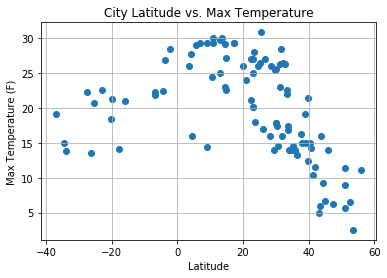

In [50]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

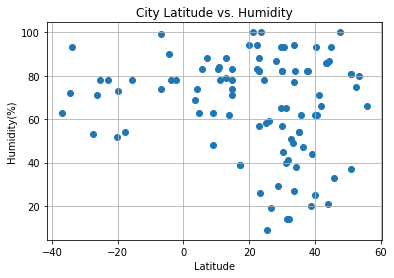

In [51]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

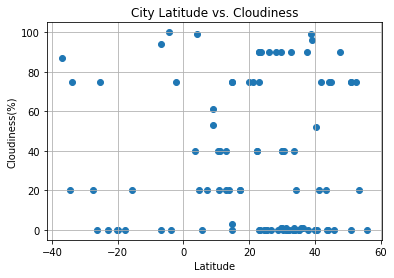

In [52]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

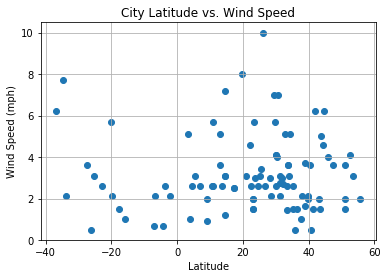

In [53]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()